In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# Upload processed_data.csv
uploaded = files.upload()
df = pd.read_csv('processed_data.csv', index_col='date', parse_dates=True)
print("EDA Data loaded:", df.shape)
print("Columns:", df.columns.tolist())


Saving processed_data.csv to processed_data.csv
EDA Data loaded: (72946, 9)
Columns: ['index', 'open', 'high', 'low', 'close', 'volume', 'marketcap', 'timestamp', 'crypto_name']


In [2]:
# Summary statistics by top cryptos
top_cryptos = df['crypto_name'].value_counts().head(5).index
stats = df[df['crypto_name'].isin(top_cryptos)].groupby('crypto_name')[['close', 'volume', 'marketcap']].agg(['mean', 'std']).round(4)
print("Summary Statistics (Top 5 Cryptos):")
print(stats)
stats.to_csv('eda_stats.csv')


Summary Statistics (Top 5 Cryptos):
              close          volume         marketcap        
               mean     std    mean     std      mean     std
crypto_name                                                  
Bitcoin      0.1426  0.2231  0.0354  0.0538    0.1389  0.2229
Dogecoin     0.0430  0.1179  0.0075  0.0386    0.0433  0.1191
Litecoin     0.1437  0.1729  0.0715  0.1192    0.1332  0.1667
Monero       0.1801  0.2008  0.0056  0.0302    0.1712  0.1929
XRP          0.0833  0.1096  0.0371  0.0817    0.0926  0.1218


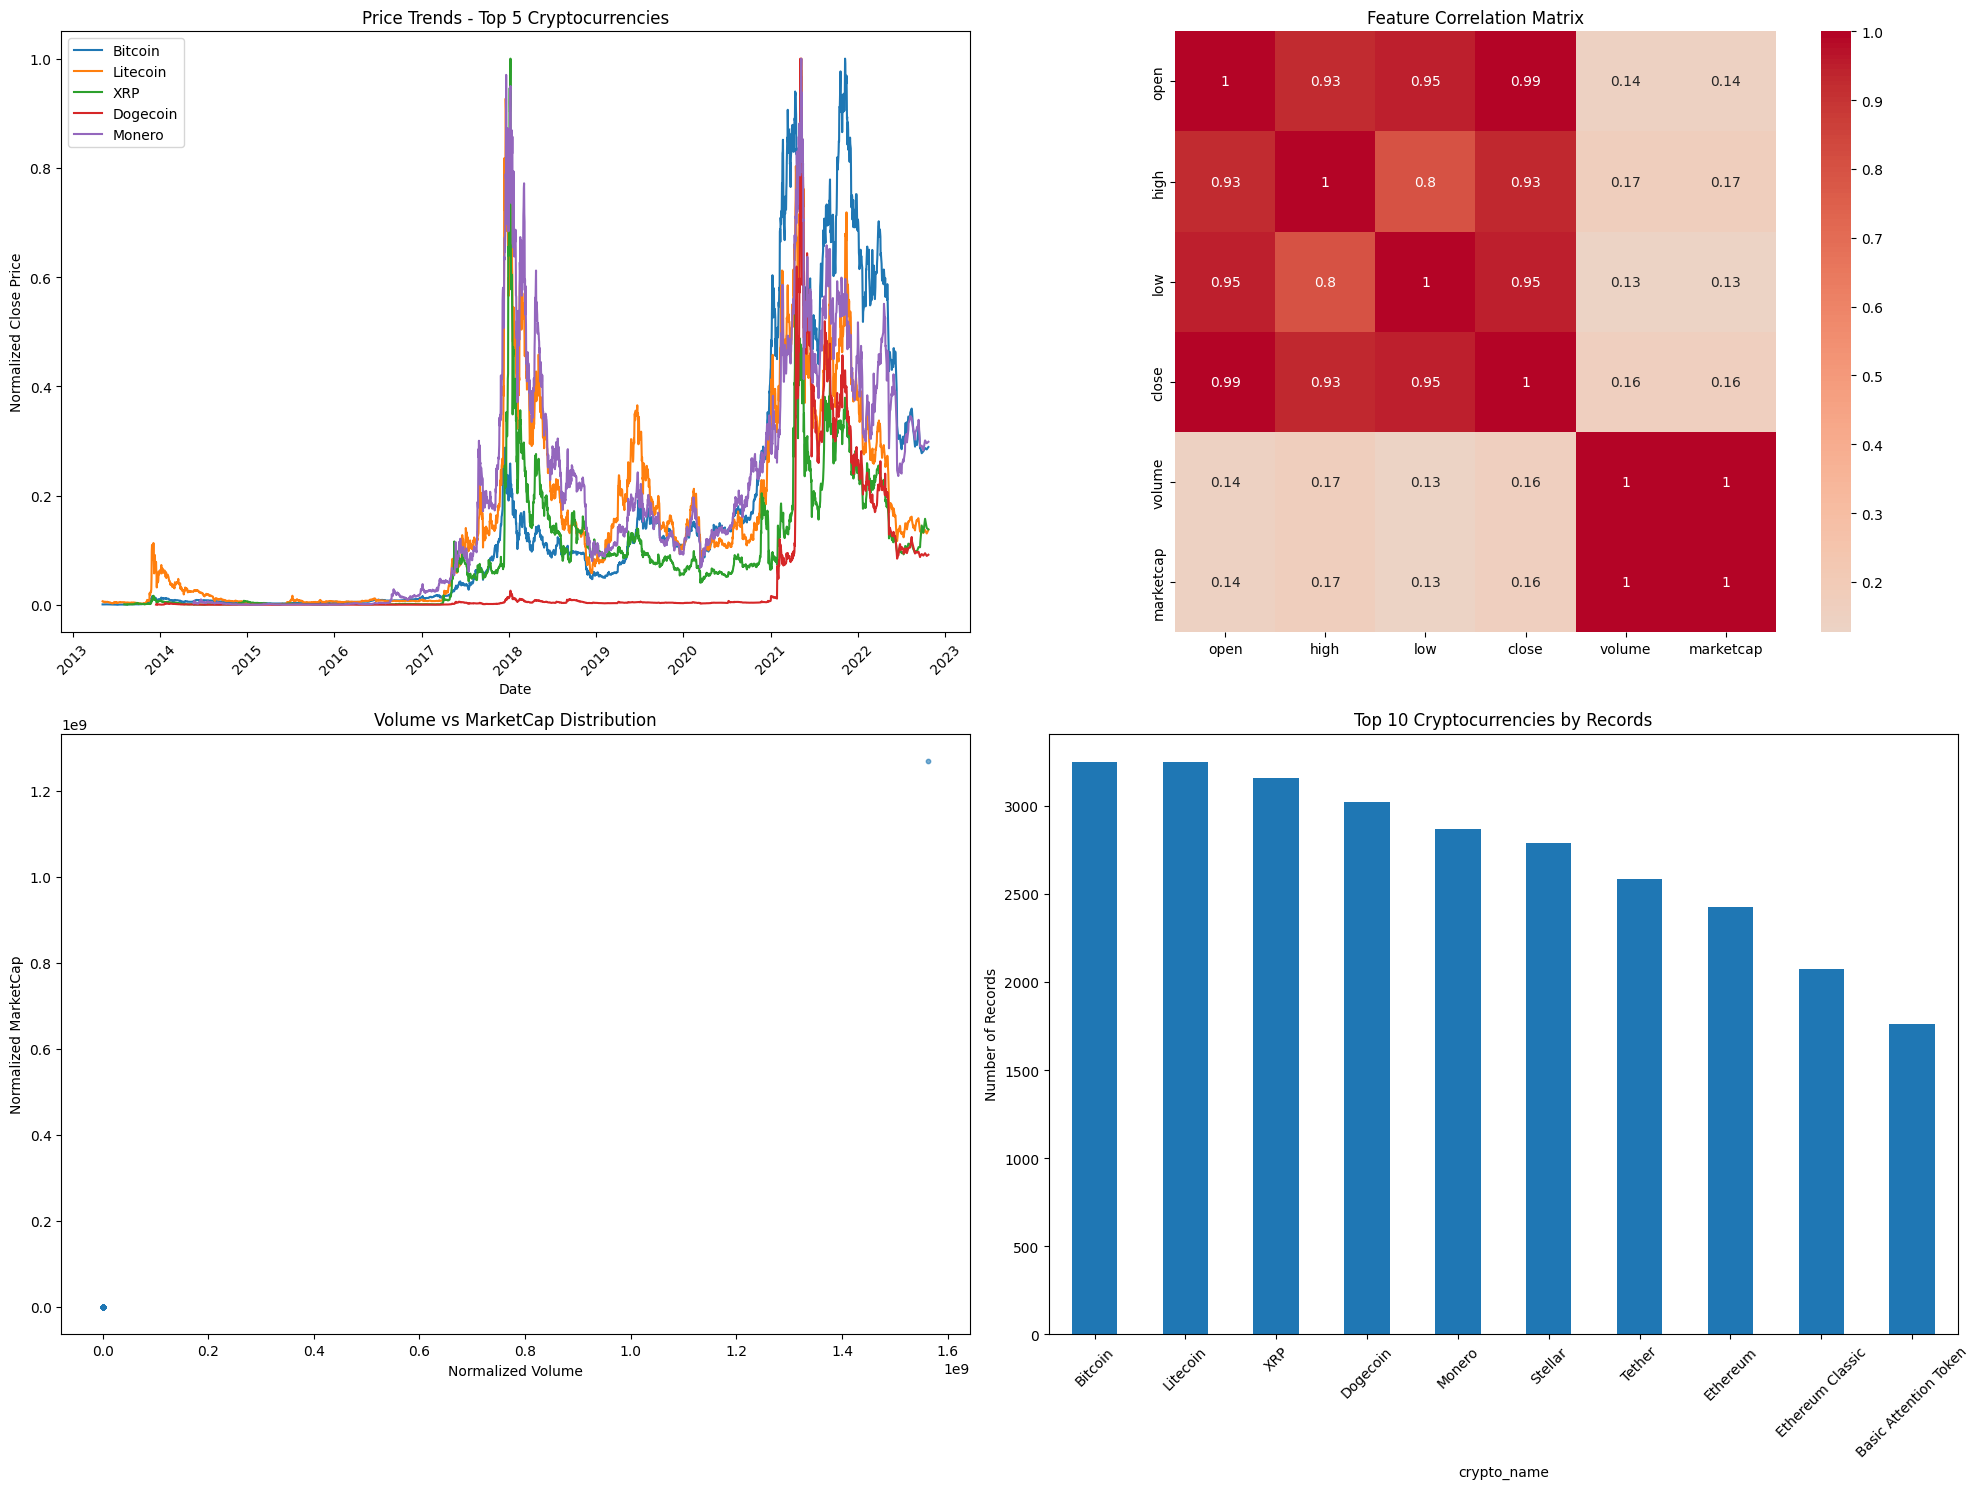

EDA plots saved as 'eda_visualizations.png'


In [3]:
plt.figure(figsize=(20, 15))

# Plot 1: Price Trends (Top 5)
plt.subplot(2, 2, 1)
for crypto in top_cryptos:
    crypto_data = df[df['crypto_name'] == crypto]['close']
    plt.plot(crypto_data.index, crypto_data, label=crypto)
plt.title('Price Trends - Top 5 Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')
plt.legend()
plt.xticks(rotation=45)

# Plot 2: Correlation Heatmap
plt.subplot(2, 2, 2)
corr_features = ['open', 'high', 'low', 'close', 'volume', 'marketcap']
corr = df[corr_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Feature Correlation Matrix')

# Plot 3: Volume vs MarketCap
plt.subplot(2, 2, 3)
plt.scatter(df['volume'], df['marketcap'], alpha=0.6, s=10)
plt.xlabel('Normalized Volume')
plt.ylabel('Normalized MarketCap')
plt.title('Volume vs MarketCap Distribution')

# Plot 4: Crypto Distribution
plt.subplot(2, 2, 4)
df['crypto_name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Cryptocurrencies by Records')
plt.xticks(rotation=45)
plt.ylabel('Number of Records')

plt.tight_layout()
plt.savefig('eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()
print("EDA plots saved as 'eda_visualizations.png'")


In [4]:
files.download('eda_visualizations.png')
files.download('eda_stats.csv')
print("EDA files ready for EDA_Report.pdf!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

EDA files ready for EDA_Report.pdf!
